In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# data list
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### Loading the data...

In [4]:
fuel_econ = pd.read_csv('datasets/fuel-econ.csv')
fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


trying jitter and truncate parameters

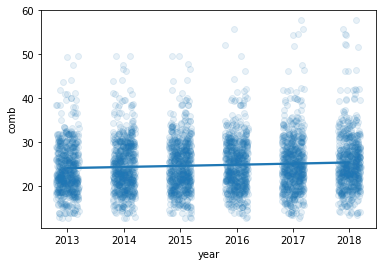

In [5]:
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=True, x_jitter=0.2, scatter_kws={'alpha':1/10});

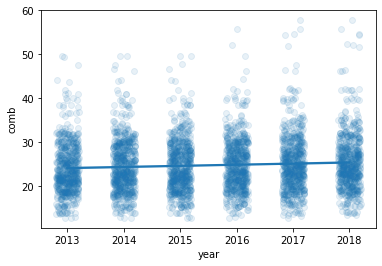

In [6]:
# with truncate...

sns.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter=0.2, scatter_kws={'alpha':1/10});

## Faceting:

This is the technique of creating multiple copies of the same plot on different subsets of the data. Faceting can be used on different types of plots. 

In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. 

Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels

#### Faceting Guidelines:

Ensure axis scales and limits are consistent across each subplot. Failure to achieve this will create misconceptions about the overall frequency or value range of the data.

In [7]:
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

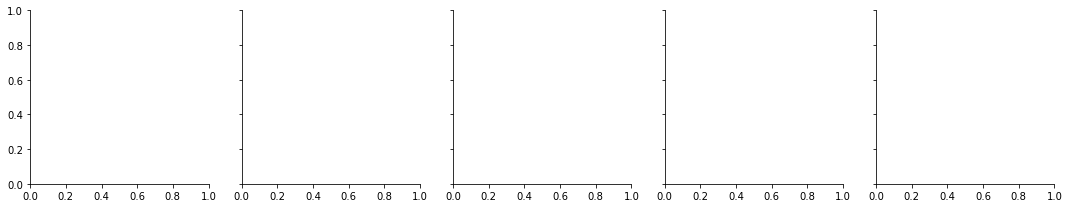

In [8]:
g = sns.FacetGrid(data=fuel_econ, col='VClass')
g;

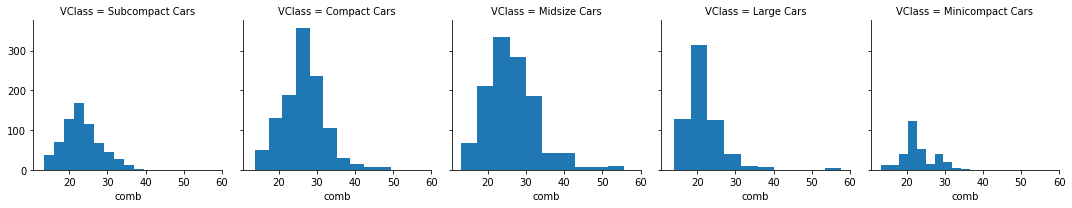

In [9]:
g.map(plt.hist, 'comb');

**Note**: In above code, it is important that you dont set `x=comb`, otherwise the faceting subplots will not work properly. see example below...

In [10]:
# g.map(plt.hist, x='comb');

Let's customize the bins and column-wrap our facet objects...

In [11]:
fuel_econ.comb.describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

In [12]:
bins = np.arange(12, 58+2, 2)

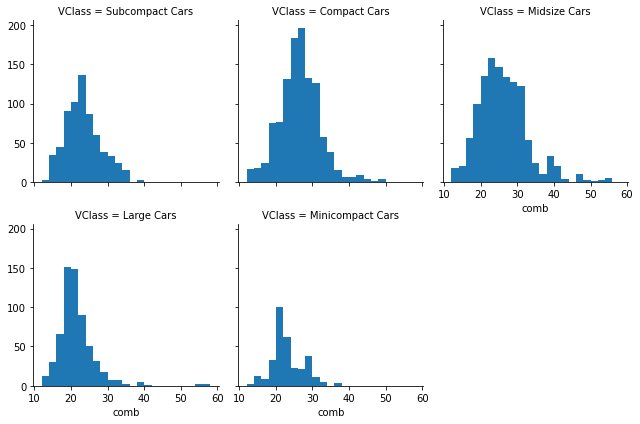

In [13]:
g = sns.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3)
g.map(plt.hist, 'comb', bins=bins);

Let's demonstrate what will happen if you don't fix the same axis limits across facets... By setting `sharey=False` in the facet object, each facet can have its own `y_axis` limit.

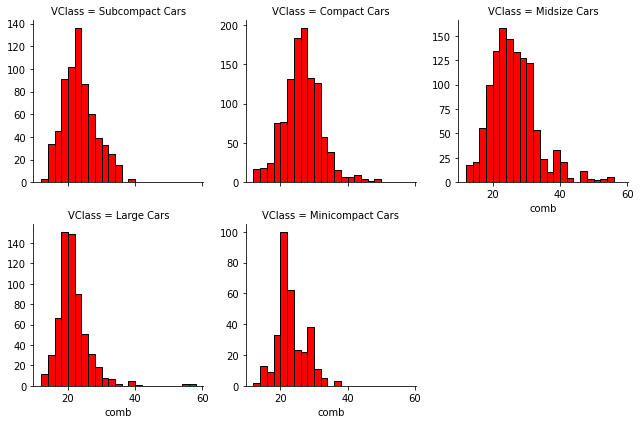

In [14]:
g = sns.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', color='red', bins=bins, edgecolor='black');

#### More on FacetGrid: Scatter Plots faceted by Categorical Variables...

In [15]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [16]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Assign column and/or row variables to add more subplots to the figure:

In [17]:
print(f'time has {tips.time.nunique()} values\nsex has {tips.sex.nunique()} values')

time has 2 values
sex has 2 values


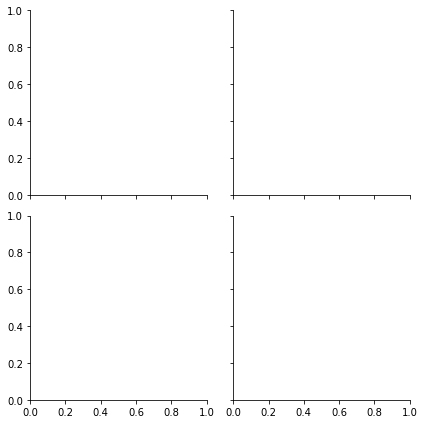

In [18]:
sns.FacetGrid(tips, col="time", row="sex");

To draw a plot on every facet, pass a function and the name of one or more columns in the dataframe to FacetGrid.map():

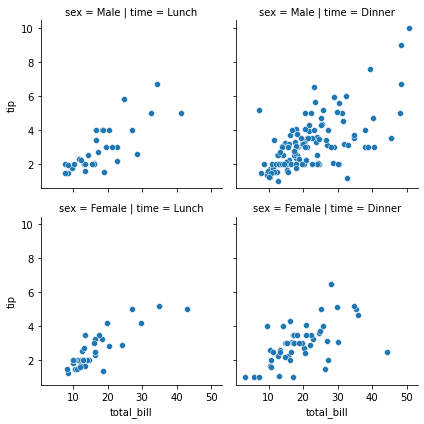

In [19]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.scatterplot, "total_bill", "tip");

Just as before, we can decide to specify bins... but in this case, since it's `sns.scatterplot` we specify `x_bins` or `y_bins`.

In [20]:
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [21]:
bins = np.arange(2.5, 50+2.5, 2.5)

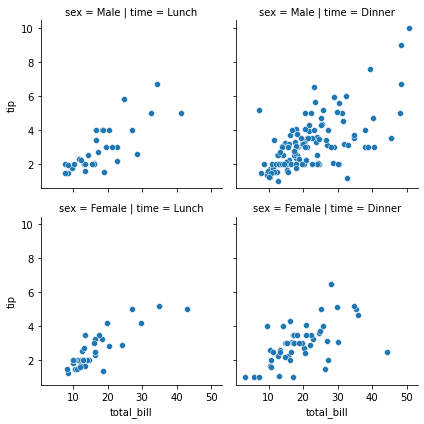

In [22]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.scatterplot, "total_bill", "tip", x_bins=bins);

Finally, we can add anaother categorical variable as a `hue` or a color dimension to the plot

In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


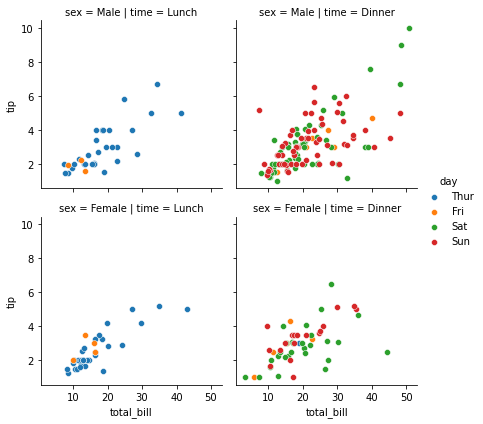

In [24]:
g = sns.FacetGrid(tips, col="time", row="sex", hue='day')
g.map(sns.scatterplot, "total_bill", "tip", x_bins=bins)
g.add_legend();

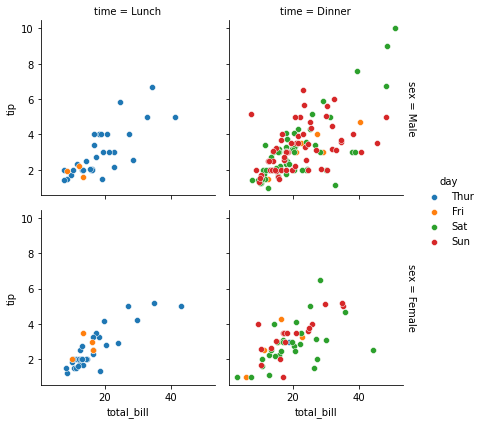

In [25]:
g = sns.FacetGrid(tips, col="time", row="sex", hue='day', margin_titles = True)
g.map(sns.scatterplot, "total_bill", "tip", x_bins=bins)
g.add_legend();